# Telecom Customer Churn

### Attributes information
**customerID:** customer ID

**gender:**    Whether the customer is a male or a female

**SeniorCitizen:**    Whether the customer is a senior citizen or not 

**Partner Whether:**    the customer has a partner or not 

**Dependents Whether** the customer has dependents or not

**tenure:** Number of months the customer has stayed with the company 

**PhoneService:** Whether the customer has a phone service or not 

**MultipleLines:** Whether the customer has multiple lines or not 

**InternetService:** Customer’s internet service provider 

**OnlineSecurity:** Whether the customer has online security or not 

**OnlineBackup:** Whether the customer has online backup or not 

**DeviceProtection:** Whether the customer has device protection or not 

**TechSupport:** Whether the customer has tech support or not 

**StreamingTV:** Whether the customer has streaming TV or not 

**StreamingMovies:**    Whether the customer has streaming movies or not 

**PaymentMethod:** The customer’s payment method 

**Contract:** The contract term of the customer 

**PaperlessBilling:** Whether the customer has paperless billing or not 

**MonthlyCharges:** The amount charged to the customer monthly 

**TotalCharges:** The total amount charged to the customer 

**Churn Whether:** the customer churned or not

# Importing necessary libraries

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier


from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report as cr

import pickle

In [2]:
warnings.filterwarnings('ignore')

# Getting Data

In [3]:
df = pd.read_csv(r"C:\Users\jhala\Desktop\telco_custchurn\Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1. Data Cleaning

# * Shape

In [5]:
df.shape

(7043, 21)

* Number of Rows = 7043
* Number of columns = 21

# * Renaming columns

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.rename(columns = {'customerID': 'ID', 'SeniorCitizen': 'senior_citizen', 'Partner': 'married', 'Dependents': 'dependents',
                     'PhoneService': 'phone_service', 'MultipleLines': 'multiple_lines', 'InternetService': 'internet',
                     'OnlineSecurity': 'online_security', 'OnlineBackup': 'online_backup', 'DeviceProtection': 'device_protection',
                     'TechSupport': 'tech_support', 'StreamingTV': 'stream_TV', 'StreamingMovies': 'stream_movies', 'Contract': 'contract',
                     'PaperlessBilling': 'paperless_billing', 'PaymentMethod': 'payment_mode','MonthlyCharges': 'monthly_charges',
                     'TotalCharges': 'total_charges', 'Churn': 'churn'}, inplace = True)

In [8]:
df.columns

Index(['ID', 'gender', 'senior_citizen', 'married', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'stream_TV',
       'stream_movies', 'contract', 'paperless_billing', 'payment_mode',
       'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

# Datatypes

In [9]:
df.dtypes

ID                    object
gender                object
senior_citizen         int64
married               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet              object
online_security       object
online_backup         object
device_protection     object
tech_support          object
stream_TV             object
stream_movies         object
contract              object
paperless_billing     object
payment_mode          object
monthly_charges      float64
total_charges         object
churn                 object
dtype: object

* Total Charges should be numeric amount. Let's convert it to numerical data type.

* Senior Citizen is a categorical columns.

In [10]:
df['total_charges'] = pd.to_numeric(df['total_charges'], errors = 'coerce')
df['senior_citizen'] = df['senior_citizen'].astype('object')

In [11]:
print(df['total_charges'].dtypes)
print(df['senior_citizen'].dtypes)

float64
object


In [12]:
df.describe()

,tenure,monthly_charges,total_charges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


Tenure: 

* Maximum tenure: 72 months

* Average tenure: 32 months

Monthly_charges:

* Maximum monthly charge = 118.75

* Minimum monthly charge = 18.25

Total Charges:

* Maximum total charges = 8684.80

* Minimum total charges = 18.80

# Check Missing Values

In [13]:
df.isnull().sum()

ID                    0
gender                0
senior_citizen        0
married               0
dependents            0
tenure                0
phone_service         0
multiple_lines        0
internet              0
online_security       0
online_backup         0
device_protection     0
tech_support          0
stream_TV             0
stream_movies         0
contract              0
paperless_billing     0
payment_mode          0
monthly_charges       0
total_charges        11
churn                 0
dtype: int64

* There are 11 missing values in total_charges.

In [14]:
null_percent = (df['total_charges'].isnull().sum()/df['total_charges'].shape[0]) * 100
null_percent

0.1561834445548772

* Since only 0.15% data have null values. We can remove these data from the dataset.

In [15]:
df[df['total_charges'].isnull() == True]

,ID,gender,senior_citizen,married,dependents,tenure,phone_service,multiple_lines,internet,online_security,...,device_protection,tech_support,stream_TV,stream_movies,contract,paperless_billing,payment_mode,monthly_charges,total_charges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
df.dropna(inplace = True)
df.reset_index(inplace = True)

In [17]:
df.drop('index', axis = 1, inplace = True)

In [18]:
df.shape

(7032, 21)

* After removing null values, we have 7032 rows.

In [19]:
df.isnull().sum()

ID                   0
gender               0
senior_citizen       0
married              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet             0
online_security      0
online_backup        0
device_protection    0
tech_support         0
stream_TV            0
stream_movies        0
contract             0
paperless_billing    0
payment_mode         0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

# * Create range of tenure 

In [20]:
print(df['tenure'].max())
print(df['monthly_charges'].max())
print(df['total_charges'].max())

72
118.75
8684.8


* Maximum tenure is of 72 months

* Maximum monthly charge is 118.75

* Maximum total charge is 8684.8

In [21]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
labels = ['5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75']
df['tenure_bins'] = pd.cut(df['tenure'], bins=bins, labels=labels)

In [22]:
df['tenure_bins'] = pd.to_numeric(df['tenure_bins'])

# * Delete irrelevant columns

In [23]:
df.drop(['ID', 'tenure'], axis = 1, inplace = True)

In [24]:
df.columns

Index(['gender', 'senior_citizen', 'married', 'dependents', 'phone_service',
       'multiple_lines', 'internet', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'stream_TV', 'stream_movies',
       'contract', 'paperless_billing', 'payment_mode', 'monthly_charges',
       'total_charges', 'churn', 'tenure_bins'],
      dtype='object')

# * Check unique values 

In [25]:
for i in df:
    
    unique_vals = df[i].unique()
        
    len_values = len(unique_vals)
 
    print('The number of values for {}: {} -- {}'.format(i, len_values,unique_vals))



The number of values for gender: 2 -- ['Female' 'Male']
The number of values for senior_citizen: 2 -- [0 1]
The number of values for married: 2 -- ['Yes' 'No']
The number of values for dependents: 2 -- ['No' 'Yes']
The number of values for phone_service: 2 -- ['No' 'Yes']
The number of values for multiple_lines: 3 -- ['No phone service' 'No' 'Yes']
The number of values for internet: 3 -- ['DSL' 'Fiber optic' 'No']
The number of values for online_security: 3 -- ['No' 'Yes' 'No internet service']
The number of values for online_backup: 3 -- ['Yes' 'No' 'No internet service']
The number of values for device_protection: 3 -- ['No' 'Yes' 'No internet service']
The number of values for tech_support: 3 -- ['No' 'Yes' 'No internet service']
The number of values for stream_TV: 3 -- ['No' 'Yes' 'No internet service']
The number of values for stream_movies: 3 -- ['No' 'Yes' 'No internet service']
The number of values for contract: 3 -- ['Month-to-month' 'One year' 'Two year']
The number of values

* For most of the categorical columns, there are same different words with same meaning --> "no" and "No internet service"

In [26]:
df['multiple_lines'] = df['multiple_lines'].replace('No phone service', 'No')
df['online_security'] = df['online_security'].replace('No internet service', 'No')
df['online_backup'] = df['online_backup'].replace('No internet service', 'No')
df['device_protection'] = df['device_protection'].replace('No internet service', 'No')
df['tech_support'] = df['tech_support'].replace('No internet service', 'No')
df['stream_TV'] = df['stream_TV'].replace('No internet service', 'No')
df['stream_movies'] = df['stream_movies'].replace('No internet service', 'No')
df['contract'] = df['contract'].replace('Month-to-month', 'Monthly')


In [27]:
for i in df:
    
    unique_vals = df[i].unique()
        
    len_values = len(unique_vals)
 
    print('The number of values for {}: {} -- {}'.format(i, len_values,unique_vals))

The number of values for gender: 2 -- ['Female' 'Male']
The number of values for senior_citizen: 2 -- [0 1]
The number of values for married: 2 -- ['Yes' 'No']
The number of values for dependents: 2 -- ['No' 'Yes']
The number of values for phone_service: 2 -- ['No' 'Yes']
The number of values for multiple_lines: 2 -- ['No' 'Yes']
The number of values for internet: 3 -- ['DSL' 'Fiber optic' 'No']
The number of values for online_security: 2 -- ['No' 'Yes']
The number of values for online_backup: 2 -- ['Yes' 'No']
The number of values for device_protection: 2 -- ['No' 'Yes']
The number of values for tech_support: 2 -- ['No' 'Yes']
The number of values for stream_TV: 2 -- ['No' 'Yes']
The number of values for stream_movies: 2 -- ['No' 'Yes']
The number of values for contract: 3 -- ['Monthly' 'One year' 'Two year']
The number of values for paperless_billing: 2 -- ['Yes' 'No']
The number of values for payment_mode: 4 -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit 

In [28]:
df.to_csv(r'C:\Users\jhala\Desktop\churn2.csv')

# 2. EDA

# * Univariate Analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

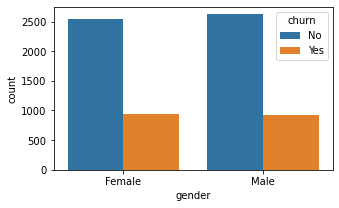

In [29]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'gender', data = df, hue = 'churn')

<AxesSubplot:xlabel='senior_citizen', ylabel='count'>

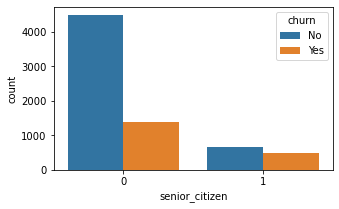

In [30]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'senior_citizen', data = df, hue = 'churn')

<AxesSubplot:xlabel='married', ylabel='count'>

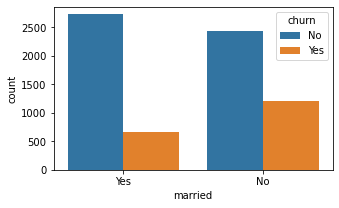

In [31]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'married', data = df, hue = 'churn')

<AxesSubplot:xlabel='dependents', ylabel='count'>

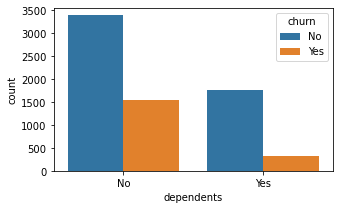

In [32]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'dependents', data = df, hue = 'churn')

<AxesSubplot:xlabel='phone_service', ylabel='count'>

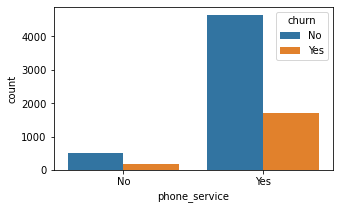

In [33]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'phone_service', data = df, hue = 'churn')

<AxesSubplot:xlabel='multiple_lines', ylabel='count'>

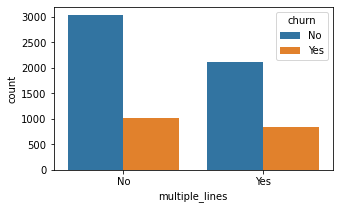

In [34]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'multiple_lines', data = df, hue = 'churn')

<AxesSubplot:xlabel='internet', ylabel='count'>

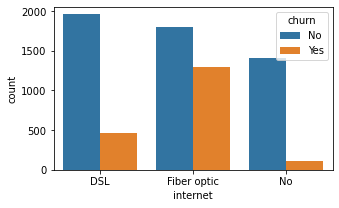

In [35]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'internet', data = df, hue = 'churn')

<AxesSubplot:xlabel='online_security', ylabel='count'>

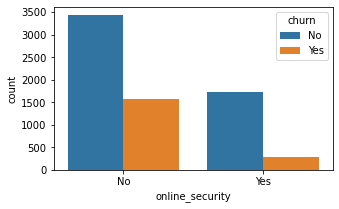

In [36]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'online_security', data = df, hue = 'churn')

<AxesSubplot:xlabel='online_backup', ylabel='count'>

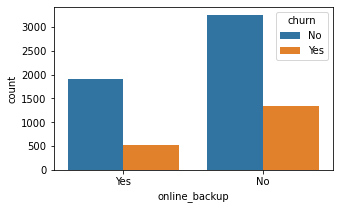

In [37]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'online_backup', data = df, hue = 'churn')

<AxesSubplot:xlabel='device_protection', ylabel='count'>

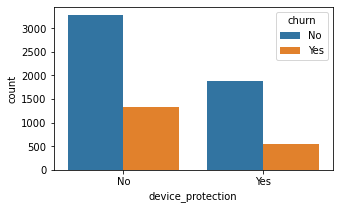

In [38]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'device_protection', data = df, hue = 'churn')

<AxesSubplot:xlabel='tech_support', ylabel='count'>

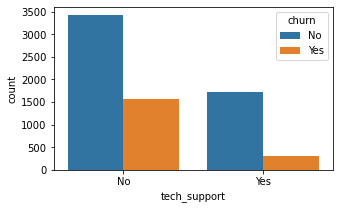

In [39]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'tech_support', data = df, hue = 'churn')

<AxesSubplot:xlabel='stream_TV', ylabel='count'>

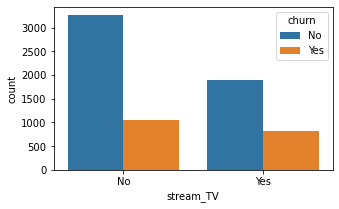

In [40]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'stream_TV', data = df, hue = 'churn')

<AxesSubplot:xlabel='stream_movies', ylabel='count'>

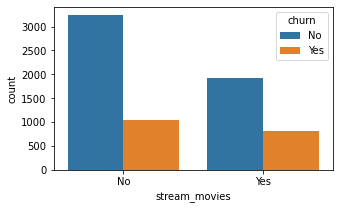

In [41]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'stream_movies', data = df, hue = 'churn')

<AxesSubplot:xlabel='contract', ylabel='count'>

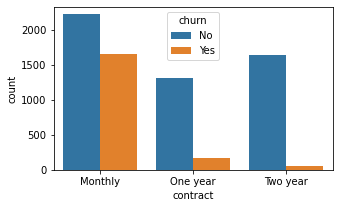

In [42]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'contract', data = df, hue = 'churn')

<AxesSubplot:xlabel='paperless_billing', ylabel='count'>

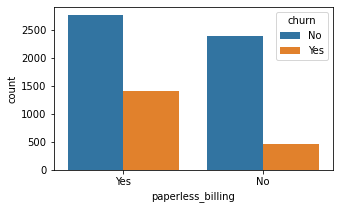

In [43]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'paperless_billing', data = df, hue = 'churn')

<AxesSubplot:xlabel='payment_mode', ylabel='count'>

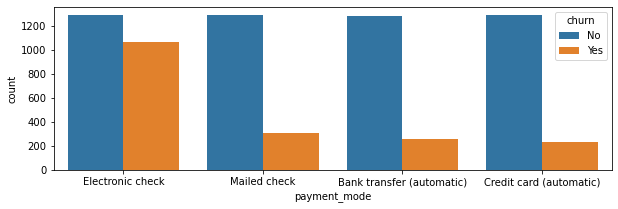

In [44]:
plt.figure(figsize = (10,3))
sns.countplot(x = 'payment_mode', data = df, hue = 'churn')

<AxesSubplot:xlabel='tenure_bins', ylabel='count'>

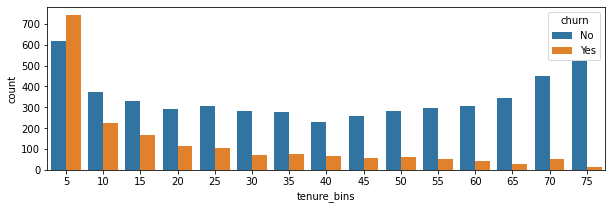

In [45]:
plt.figure(figsize = (10,3))
sns.countplot(x = 'tenure_bins', data = df, hue = 'churn')

<AxesSubplot:xlabel='churn', ylabel='count'>

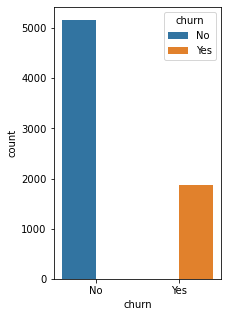

In [46]:
plt.figure(figsize = (3,5))
sns.countplot(x = 'churn', data = df, hue = 'churn')

In [47]:
df['churn'].value_counts()

No     5163
Yes    1869
Name: churn, dtype: int64

In [48]:
df['churn'].value_counts() / len(df['churn']) * 100

No     73.421502
Yes    26.578498
Name: churn, dtype: float64

* Univariate Analysis:

   1. Gender: 
             Approximately same rate of churn in male and female.

   2. Senior Citizen: 
                     A. Most of the customers are not Senior Citizens. 
                     B. Churn rate is low in senior citizens.
   
   3. Married: 
              Churn rate is high in non-married customers.
   
   4. Dependents: 
                  A. Most of the customer are not dependents.
                  B. Churn rate is high in non-dependent customers.

   5. Phone Service: 
                     A. Most of the customers are using phone service.
                     B. Churn rate is also high in those customers who are  
                        using phone service.

   6. Multiple Lines: 
                      A. Most of the customers are not using multiple lines.
                      B. Approximately same churn rate in both categories. 

   7. Internet Service: 
                        A. Higher churn rate for customers using Fiber Optic.
                        B. Very less churn rate for customers who are not using 
                           internet.

   8. Online Security:
                      A. Most of the customers are not using online security    service.
                      B. Higher churn rate in those customers who are not using this service.

   9. Online Backup:
                    A. Most of the customers are not using online backup facility.
                    B. Churn rate is also high in this category.

   10. Device Protection:
                         A. Most of the customers are not using device protection facility.
                         B. Churn rate is also high in this category.

   11. Tech Support:
                    A. Most of the customers are not using tech support facility.
                    B. Churn rate is too high in this category.

   12. Stream TV:
                 A. Most of the customers are not using TV facility.
                 B. Approximately same churn rate in both the categories.

   13. Stream Movies:
                     A. Most of the customers are not using Movies facility.
                     B. Approximately same churn rate in both the categories.
   14. Contract: 
                A. Most of the people are on monthly contract.
                B. Very high churn rate in monthly contract.
                C. Very low churn rate in two year contract.

   15. Paperless Billing: 
                         High churn rate in those customers who are using 
                         paperless billing facility.  

   16. Payment Mode: 
                    Very high churn rate in those customers who are using "Electronic Check" method as payment mode. 

   17. Tenure: 
              A. The shorter the tenure, the more likely the user will churn.
              B. Many churned users only have 5 or lower months of tenure.

   18. Churn: 
             A. Data is highly imbalanced as there are only 26.5% of churned users in this dataset.
             B. Ratio: 73:27
             C. We need to perform resampling.

# * Bivariate Analysis

<AxesSubplot:xlabel='monthly_charges', ylabel='total_charges'>

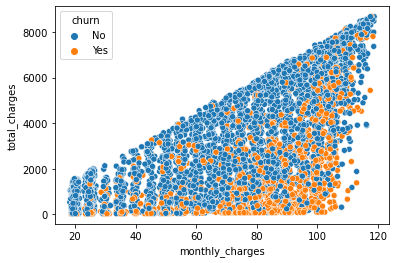

In [49]:
sns.scatterplot(data = df, x ='monthly_charges', y = 'total_charges', hue = 'churn')

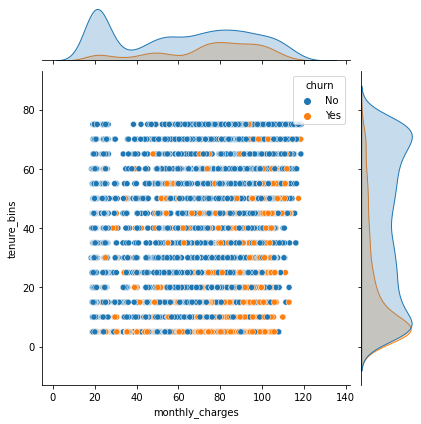

In [50]:
sns.jointplot(data = df, x ='monthly_charges', y = 'tenure_bins', hue = 'churn')

<AxesSubplot:xlabel='contract', ylabel='tenure_bins'>

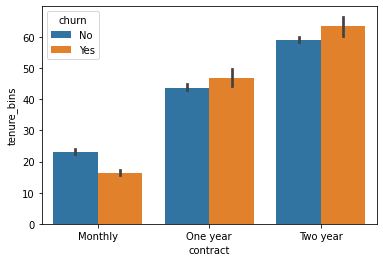

In [51]:
sns.barplot(data = df, x ='contract', y = 'tenure_bins', hue = 'churn')

* Bivariate Analysis:

    1. Total Charges increases as Monthly Charges increases.
    2. Higher Churn rate at lower total charges.
    3. Higher churn rate when tenure is less and monthly charges are high.
    4. Higher churn rate when tenure is high and contract is of two years.



# 3. Data Preprocessing

In data pre-processing we will perform:

1. Check outliers
2. Check correlation
3. Create Dummies 
4. Apply SMOTE 
5. Apply Standard Scaling

# * Convert churn column to 0 and 1

In [52]:
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})

In [53]:
df.head()

,gender,senior_citizen,married,dependents,phone_service,multiple_lines,internet,online_security,online_backup,device_protection,tech_support,stream_TV,stream_movies,contract,paperless_billing,payment_mode,monthly_charges,total_charges,churn,tenure_bins
0,Female,0,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Electronic check,29.85,29.85,0,5
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,35
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Mailed check,53.85,108.15,1,5
3,Male,0,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,45
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Electronic check,70.70,151.65,1,5


# Check outliers

In [54]:
def outliers_box(d_f,col_):
    q1 = np.quantile(d_f[col_],.25)
    q2 = np.quantile(d_f[col_],.75)
    iqr = q2-q1
    maxima_ = q2 + 1.5*iqr
    minima_ = q1 - 1.5*iqr
    
    if((d_f[col_].max() > maxima_) or (d_f[col_].min() < minima_)):
        print(col_,'------- Outliers present')
    else:
        print(col_,'------- Outliers not present')
        
    return(minima_,maxima_)

In [55]:
def out_remove(d_f,col_):
    x1,y1 = outliers_box(d_f,col_)
    df.drop(index= d_f[(d_f[col_]<x1) | (d_f[col_]>y1)].index, axis = 0, inplace =True)

In [56]:
df_num = df.select_dtypes(exclude = 'object')
for i in df_num.columns:
    out_remove(df,i)
    df.reset_index(drop=True,inplace = True)

monthly_charges ------- Outliers not present
total_charges ------- Outliers not present
churn ------- Outliers not present
tenure_bins ------- Outliers not present


<AxesSubplot:xlabel='total_charges'>

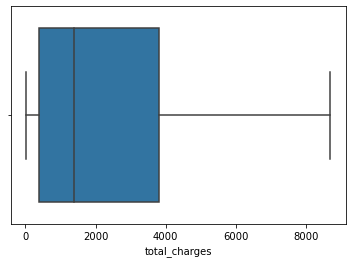

In [57]:
sns.boxplot(df['total_charges'])

* No outliers are present in the data.

# * Check correlation

In [58]:
df.corr()

,monthly_charges,total_charges,churn,tenure_bins
monthly_charges,1.000000,0.651065,0.192858,0.245210
total_charges,0.651065,1.000000,-0.199484,0.825270
churn,0.192858,-0.199484,1.000000,-0.351312
tenure_bins,0.245210,0.825270,-0.351312,1.000000


<AxesSubplot:>

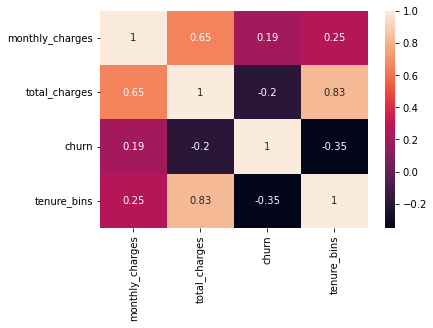

In [59]:
sns.heatmap(df.corr(), annot = True)

* Tenure has 80% correlation with Total Charges.

* We will keep both the columns, as both are important for churn prediction

# * Create Dummies

In [60]:
def dummy_create(d_f):
    d_f_cat = d_f.select_dtypes(include = 'object')
    d_f_num = d_f.select_dtypes(exclude = 'object')
    d_f_dummy = pd.get_dummies(d_f_cat, drop_first = True)
    new_df = pd.concat([d_f_dummy, d_f_num], axis = 1)
    return new_df

In [61]:
new_df = dummy_create(df)

In [62]:
new_df.head()

,gender_Male,senior_citizen_1,married_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Yes,internet_Fiber optic,internet_No,online_security_Yes,online_backup_Yes,...,contract_One year,contract_Two year,paperless_billing_Yes,payment_mode_Credit card (automatic),payment_mode_Electronic check,payment_mode_Mailed check,monthly_charges,total_charges,churn,tenure_bins
0,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,29.85,29.85,0,5
1,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,56.95,1889.50,0,35
2,1,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,1,53.85,108.15,1,5
3,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,42.30,1840.75,0,45
4,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,70.70,151.65,1,5


In [63]:
new_df.columns

Index(['gender_Male', 'senior_citizen_1', 'married_Yes', 'dependents_Yes',
       'phone_service_Yes', 'multiple_lines_Yes', 'internet_Fiber optic',
       'internet_No', 'online_security_Yes', 'online_backup_Yes',
       'device_protection_Yes', 'tech_support_Yes', 'stream_TV_Yes',
       'stream_movies_Yes', 'contract_One year', 'contract_Two year',
       'paperless_billing_Yes', 'payment_mode_Credit card (automatic)',
       'payment_mode_Electronic check', 'payment_mode_Mailed check',
       'monthly_charges', 'total_charges', 'churn', 'tenure_bins'],
      dtype='object')

# * SMOTE

In [64]:
def smote_sampling(d_f, tar_col):
    x = d_f.drop(tar_col, axis = 1)
    y = d_f[tar_col]
    
    X,Y = SMOTE().fit_resample(x,y)
    new_d_f = pd.concat([X,Y],axis = 1) 
    return new_d_f

In [65]:
resample_df = smote_sampling(new_df, 'churn')

In [66]:
resample_df.shape

(10326, 24)

# * Scaling

In [67]:
scale = resample_df.drop('churn', axis = 1)

In [68]:
ss = StandardScaler()

In [69]:
scaled_data = ss.fit_transform(scale)

In [70]:
scaled_df = pd.DataFrame(scaled_data, columns = scale.columns)

In [71]:
scaled_df

,gender_Male,senior_citizen_1,married_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Yes,internet_Fiber optic,internet_No,online_security_Yes,online_backup_Yes,...,stream_movies_Yes,contract_One year,contract_Two year,paperless_billing_Yes,payment_mode_Credit card (automatic),payment_mode_Electronic check,payment_mode_Mailed check,monthly_charges,total_charges,tenure_bins
0,-0.872132,-0.398161,1.290261,-0.523627,-2.919902,-0.792262,-1.023320,-0.44331,-0.507676,1.631472,...,-0.749470,-0.418184,-0.445654,0.828011,-0.424081,1.361640,-0.469492,-1.324065,-0.928063,-1.056437
1,1.146616,-0.398161,-0.775037,-0.523627,0.342477,-0.792262,-1.023320,-0.44331,1.969762,-0.612943,...,-0.749470,2.391293,-0.445654,-1.207713,-0.424081,-0.734409,2.129960,-0.382144,-0.076795,0.204615
2,1.146616,-0.398161,-0.775037,-0.523627,0.342477,-0.792262,-1.023320,-0.44331,1.969762,1.631472,...,-0.749470,-0.418184,-0.445654,0.828011,-0.424081,-0.734409,2.129960,-0.489891,-0.892221,-1.056437
3,1.146616,-0.398161,-0.775037,-0.523627,-2.919902,-0.792262,-1.023320,-0.44331,1.969762,-0.612943,...,-0.749470,2.391293,-0.445654,-1.207713,-0.424081,-0.734409,-0.469492,-0.891337,-0.099110,0.624965
4,-0.872132,-0.398161,-0.775037,-0.523627,0.342477,-0.792262,0.977211,-0.44331,-0.507676,-0.612943,...,-0.749470,-0.418184,-0.445654,0.828011,-0.424081,1.361640,-0.469492,0.095768,-0.872309,-1.056437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,-0.872132,-0.398161,-0.775037,-0.523627,0.342477,-0.792262,0.977211,-0.44331,-0.507676,-0.612943,...,-0.749470,-0.418184,-0.445654,0.828011,-0.424081,-0.734409,-0.469492,0.613169,-0.054277,-0.173701
10322,-0.872132,-0.398161,-0.775037,-0.523627,0.342477,-0.792262,0.977211,-0.44331,-0.507676,-0.612943,...,-0.749470,-0.418184,-0.445654,0.828011,-0.424081,1.361640,-0.469492,0.057657,-0.909866,-1.056437
10323,1.146616,-0.398161,-0.775037,-0.523627,0.342477,1.262208,0.977211,-0.44331,-0.507676,1.631472,...,1.334275,-0.418184,-0.445654,0.828011,-0.424081,1.361640,-0.469492,1.301892,1.019341,0.414790
10324,-0.872132,-0.398161,1.290261,-0.523627,0.342477,-0.792262,0.977211,-0.44331,-0.507676,-0.612943,...,-0.749470,-0.418184,-0.445654,0.828011,-0.424081,-0.734409,-0.469492,0.812791,0.954375,0.793106


In [72]:
scaled_df.columns

Index(['gender_Male', 'senior_citizen_1', 'married_Yes', 'dependents_Yes',
       'phone_service_Yes', 'multiple_lines_Yes', 'internet_Fiber optic',
       'internet_No', 'online_security_Yes', 'online_backup_Yes',
       'device_protection_Yes', 'tech_support_Yes', 'stream_TV_Yes',
       'stream_movies_Yes', 'contract_One year', 'contract_Two year',
       'paperless_billing_Yes', 'payment_mode_Credit card (automatic)',
       'payment_mode_Electronic check', 'payment_mode_Mailed check',
       'monthly_charges', 'total_charges', 'tenure_bins'],
      dtype='object')

# 4. Model Building

In [73]:
X = scaled_df
y = resample_df['churn']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 104)

# * Scorecard Function:

In [75]:
df_scorecard = pd.DataFrame(columns = ['Model_name', 'Accuracy_Score', 'Precision_Score', 'Recall_Score'])

In [76]:
def score_card(d_f, model_name, y_pred, k):
    dfx = d_f.append(pd.Series({'Model_name': model_name, 
                     'Accuracy_Score': accuracy_score(y_test, y_pred), 
                     'Precision_Score': precision_score(y_test, y_pred, average = 'macro'), 
                     'Recall_Score': recall_score(y_test, y_pred, average = 'macro')}), ignore_index = True)
    return dfx

# 1. Logistic Regression

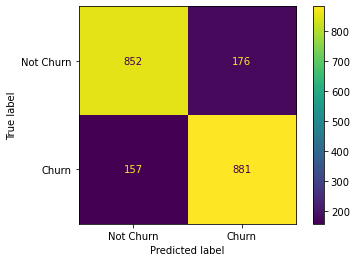

In [77]:
lr = LogisticRegression(solver = 'liblinear', penalty = 'l1')
model_lr = lr.fit(X_train, y_train)
ypred_lr = model_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, ypred_lr)
(ConfusionMatrixDisplay(confusion_matrix = cm_lr, display_labels = ['Not Churn', 'Churn'])).plot()

In [78]:
df101 = score_card(df_scorecard, 'Logistic Regression', ypred_lr, y_test) 
df101

,Model_name,Accuracy_Score,Precision_Score,Recall_Score
0,Logistic Regression,0.838819,0.838946,0.838771


# 2. Decision Tree: Entropy

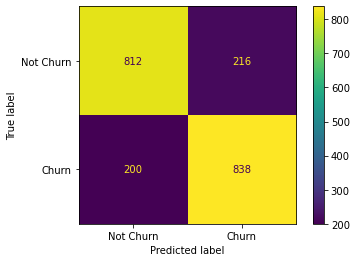

In [79]:
dtc_en = DecisionTreeClassifier(criterion = 'entropy')
model_en = dtc_en.fit(X_train, y_train)
ypred_en = model_en.predict(X_test)
cm_en = confusion_matrix(y_test, ypred_en)
(ConfusionMatrixDisplay(confusion_matrix = cm_en, display_labels = ['Not Churn', 'Churn'])).plot()

In [80]:
df102 = score_card(df101, 'Decision Tree: Entropy', ypred_en, y_test) 
df102

,Model_name,Accuracy_Score,Precision_Score,Recall_Score
0,Logistic Regression,0.838819,0.838946,0.838771
1,Decision Tree: Entropy,0.798645,0.798719,0.798603


# 3. Decision Tree: Gini

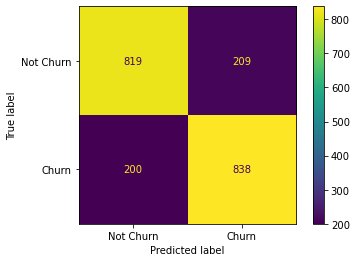

In [81]:
dtc_gn = DecisionTreeClassifier(criterion = 'gini')
model_gn = dtc_gn.fit(X_train, y_train)
ypred_gn = model_gn.predict(X_test)
cm_gn = confusion_matrix(y_test, ypred_gn)
(ConfusionMatrixDisplay(confusion_matrix = cm_gn, display_labels = ['Not Churn', 'Churn'])).plot()

In [82]:
df103 = score_card(df102, 'Decision Tree: Gini', ypred_gn, y_test) 
df103

,Model_name,Accuracy_Score,Precision_Score,Recall_Score
0,Logistic Regression,0.838819,0.838946,0.838771
1,Decision Tree: Entropy,0.798645,0.798719,0.798603
2,Decision Tree: Gini,0.802033,0.802056,0.802007


# 4. Decision Tree: GridSearchCV

In [83]:
htmodel = gscv(DecisionTreeClassifier(criterion = 'gini'), param_grid = {'max_depth': [5,10,15,20,25,30],
                                                       'min_samples_leaf': [1,2],
                                                       'min_samples_split': [1,2,3,4]}, cv = 5)

In [84]:
htmodel.fit(X,y)
print(htmodel.best_params_)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [85]:
model_gscv = DecisionTreeClassifier(criterion = 'gini', max_depth = htmodel.best_params_.get('max_depth'),
         min_samples_leaf = htmodel.best_params_.get('min_samples_leaf'),
         min_samples_split = htmodel.best_params_.get('min_samples_split')).fit(X_train, y_train)

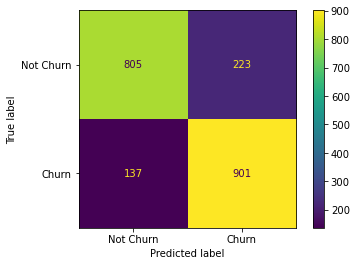

In [86]:
ypred_gscv = model_gscv.predict(X_test)
cm_gscv = confusion_matrix(y_test, ypred_gscv)
(ConfusionMatrixDisplay(confusion_matrix = cm_gscv, display_labels = ['Not Churn', 'Churn'])).plot()

In [87]:
df104 = score_card(df103, 'Decision Tree: GridSearchCV', ypred_gscv, y_test) 
df104

,Model_name,Accuracy_Score,Precision_Score,Recall_Score
0,Logistic Regression,0.838819,0.838946,0.838771
1,Decision Tree: Entropy,0.798645,0.798719,0.798603
2,Decision Tree: Gini,0.802033,0.802056,0.802007
3,Decision Tree: GridSearchCV,0.82575,0.828083,0.825545


# 5. Random Forest

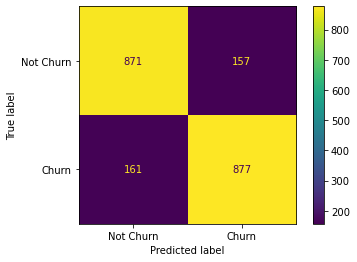

In [104]:
rf = RandomForestClassifier(n_estimators = 50, random_state = 104)
model_rf = rf.fit(X_train, y_train)
ypred_rf = model_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, ypred_rf)
(ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = ['Not Churn', 'Churn'])).plot()

<BarContainer object of 23 artists>

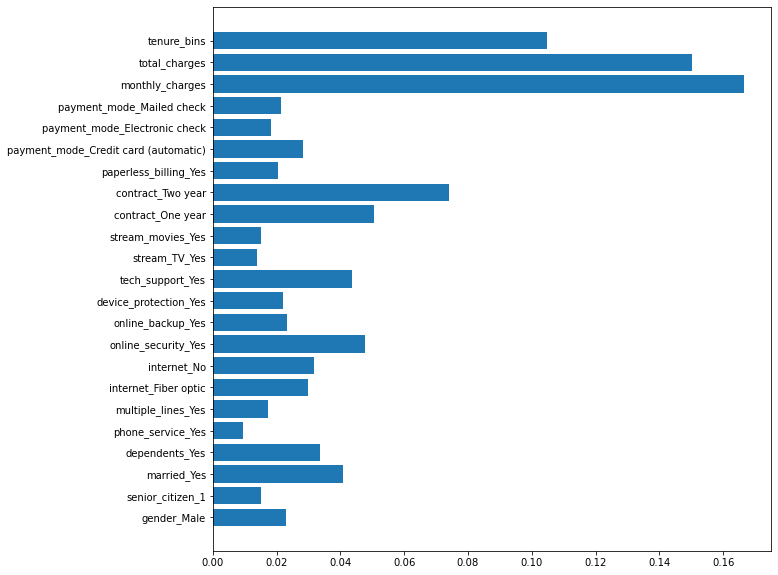

In [105]:
plt.figure(figsize = (10,10))
fi_rf = model_rf.feature_importances_

plt.barh(X.columns, model_rf.feature_importances_)

* According to Random Forest, most important features are Total Charges and Monthly Charges. 

In [106]:
df105 = score_card(df104, 'Random Forest', ypred_rf, y_test) 
df105

,Model_name,Accuracy_Score,Precision_Score,Recall_Score
0,Logistic Regression,0.838819,0.838946,0.838771
1,Decision Tree: Entropy,0.798645,0.798719,0.798603
2,Decision Tree: Gini,0.802033,0.802056,0.802007
3,Decision Tree: GridSearchCV,0.82575,0.828083,0.825545
4,Random Forest,0.846079,0.846077,0.846085


# 7. Bagging

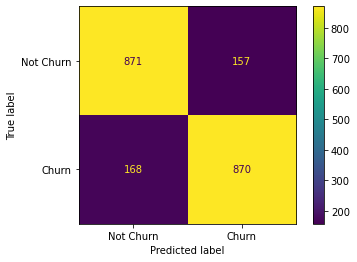

In [107]:
bg = BaggingClassifier(n_estimators = 80, random_state = 104)
model_bg = bg.fit(X_train, y_train)
ypred_bg = model_bg.predict(X_test)
cm_bg = confusion_matrix(y_test, ypred_bg)
(ConfusionMatrixDisplay(confusion_matrix = cm_bg, display_labels = ['Not Churn', 'Churn'])).plot()

In [118]:
df107 = score_card(df105, 'Bagging Classifier', ypred_bg, y_test) 
df107

,Model_name,Accuracy_Score,Precision_Score,Recall_Score
0,Logistic Regression,0.838819,0.838946,0.838771
1,Decision Tree: Entropy,0.798645,0.798719,0.798603
2,Decision Tree: Gini,0.802033,0.802056,0.802007
3,Decision Tree: GridSearchCV,0.82575,0.828083,0.825545
4,Random Forest,0.846079,0.846077,0.846085
5,Bagging Classifier,0.842691,0.842717,0.842713


# 8. Bagging: Random Forest

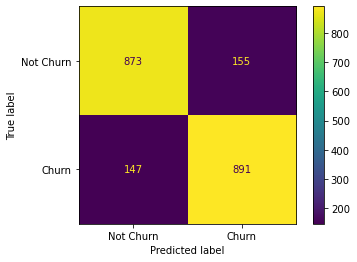

In [119]:
bg_rf = BaggingClassifier(RandomForestClassifier(n_estimators = 80, random_state = 104))
model_bg_rf = bg_rf.fit(X_train, y_train)
ypred_bg_rf = model_bg_rf.predict(X_test)
cm_bg_rf = confusion_matrix(y_test, ypred_bg_rf)
(ConfusionMatrixDisplay(confusion_matrix = cm_bg_rf, display_labels = ['Not Churn', 'Churn'])).plot()

In [120]:
df108 = score_card(df107, 'Bagging Classifier: Random Forest', ypred_bg_rf, y_test) 
df108

,Model_name,Accuracy_Score,Precision_Score,Recall_Score
0,Logistic Regression,0.838819,0.838946,0.838771
1,Decision Tree: Entropy,0.798645,0.798719,0.798603
2,Decision Tree: Gini,0.802033,0.802056,0.802007
3,Decision Tree: GridSearchCV,0.82575,0.828083,0.825545
4,Random Forest,0.846079,0.846077,0.846085
5,Bagging Classifier,0.842691,0.842717,0.842713
6,Bagging Classifier: Random Forest,0.853824,0.853849,0.853802


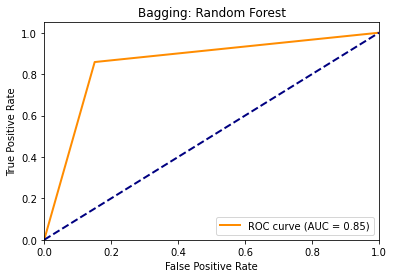

In [121]:

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, ypred_bg_rf)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging: Random Forest')
plt.legend(loc="lower right")
plt.show()

# 10. AdaBoost Classifier

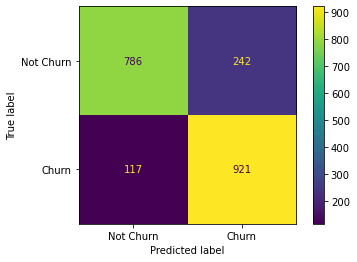

In [122]:
ab = AdaBoostClassifier(n_estimators = 30, random_state = 104)
model_ab = ab.fit(X_train, y_train)
ypred_ab = model_ab.predict(X_test)
cm_ab = confusion_matrix(y_test, ypred_ab)
(ConfusionMatrixDisplay(confusion_matrix = cm_ab, display_labels = ['Not Churn', 'Churn'])).plot()

In [123]:
df110 = score_card(df108, 'AdaBoost', ypred_ab, y_test) 
df110

,Model_name,Accuracy_Score,Precision_Score,Recall_Score
0,Logistic Regression,0.838819,0.838946,0.838771
1,Decision Tree: Entropy,0.798645,0.798719,0.798603
2,Decision Tree: Gini,0.802033,0.802056,0.802007
3,Decision Tree: GridSearchCV,0.82575,0.828083,0.825545
4,Random Forest,0.846079,0.846077,0.846085
5,Bagging Classifier,0.842691,0.842717,0.842713
6,Bagging Classifier: Random Forest,0.853824,0.853849,0.853802
7,AdaBoost,0.826234,0.831175,0.825937


# 12. SVM

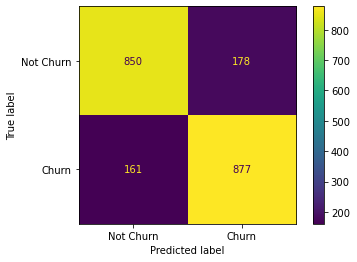

In [124]:
svm = SVC(kernel = 'rbf')
model_svm = svm.fit(X_train, y_train)
ypred_svm = model_svm.predict(X_test)
cm_svm = confusion_matrix(y_test, ypred_svm)
(ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = ['Not Churn', 'Churn'])).plot()

In [125]:
df112 = score_card(df110, 'SVM', ypred_svm, y_test) 
df112

,Model_name,Accuracy_Score,Precision_Score,Recall_Score
0,Logistic Regression,0.838819,0.838946,0.838771
1,Decision Tree: Entropy,0.798645,0.798719,0.798603
2,Decision Tree: Gini,0.802033,0.802056,0.802007
3,Decision Tree: GridSearchCV,0.82575,0.828083,0.825545
4,Random Forest,0.846079,0.846077,0.846085
5,Bagging Classifier,0.842691,0.842717,0.842713
6,Bagging Classifier: Random Forest,0.853824,0.853849,0.853802
7,AdaBoost,0.826234,0.831175,0.825937
8,SVM,0.835915,0.836016,0.835871


# 13. Naive Bayes

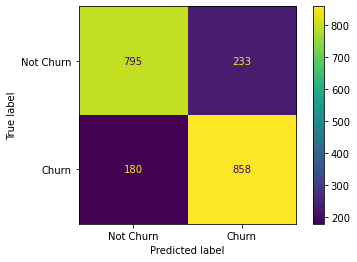

In [126]:
bnb = BernoulliNB()
model_bnb = bnb.fit(X_train, y_train)
ypred_bnb = model_bnb.predict(X_test)
cm_bnb = confusion_matrix(y_test, ypred_bnb)
(ConfusionMatrixDisplay(confusion_matrix = cm_bnb, display_labels = ['Not Churn', 'Churn'])).plot()

In [127]:
df113 = score_card(df112, 'Naive Bayes', ypred_bnb, y_test) 
df113

,Model_name,Accuracy_Score,Precision_Score,Recall_Score
0,Logistic Regression,0.838819,0.838946,0.838771
1,Decision Tree: Entropy,0.798645,0.798719,0.798603
2,Decision Tree: Gini,0.802033,0.802056,0.802007
3,Decision Tree: GridSearchCV,0.82575,0.828083,0.825545
4,Random Forest,0.846079,0.846077,0.846085
5,Bagging Classifier,0.842691,0.842717,0.842713
6,Bagging Classifier: Random Forest,0.853824,0.853849,0.853802
7,AdaBoost,0.826234,0.831175,0.825937
8,SVM,0.835915,0.836016,0.835871
9,Naive Bayes,0.800097,0.80091,0.799968


# 14. KNeighbors Classifier

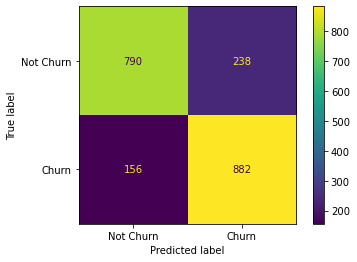

In [128]:
knc = KNeighborsClassifier()
model_knc = knc.fit(X_train, y_train)
ypred_knc = model_knc.predict(X_test)
cm_knc = confusion_matrix(y_test, ypred_knc)
(ConfusionMatrixDisplay(confusion_matrix = cm_knc, display_labels = ['Not Churn', 'Churn'])).plot()

In [129]:
df114 = score_card(df113, 'KNeighbors Classifier', ypred_knc, y_test) 
df114

,Model_name,Accuracy_Score,Precision_Score,Recall_Score
0,Logistic Regression,0.838819,0.838946,0.838771
1,Decision Tree: Entropy,0.798645,0.798719,0.798603
2,Decision Tree: Gini,0.802033,0.802056,0.802007
3,Decision Tree: GridSearchCV,0.82575,0.828083,0.825545
4,Random Forest,0.846079,0.846077,0.846085
5,Bagging Classifier,0.842691,0.842717,0.842713
6,Bagging Classifier: Random Forest,0.853824,0.853849,0.853802
7,AdaBoost,0.826234,0.831175,0.825937
8,SVM,0.835915,0.836016,0.835871
9,Naive Bayes,0.800097,0.80091,0.799968


# 14. XGBoost

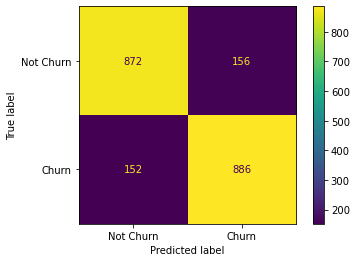

In [130]:
xgb = XGBClassifier(n_estimators = 80, random_state = 102)
model_xgb = xgb.fit(X_train, y_train)
ypred_xgb = model_xgb.predict(X_test)
cm_xgb = confusion_matrix(y_test, ypred_xgb)
(ConfusionMatrixDisplay(confusion_matrix = cm_xgb, display_labels = ['Not Churn', 'Churn'])).plot()

In [131]:
df115 = score_card(df114, 'XGBoost Classifier', ypred_xgb, y_test) 
df115

,Model_name,Accuracy_Score,Precision_Score,Recall_Score
0,Logistic Regression,0.838819,0.838946,0.838771
1,Decision Tree: Entropy,0.798645,0.798719,0.798603
2,Decision Tree: Gini,0.802033,0.802056,0.802007
3,Decision Tree: GridSearchCV,0.82575,0.828083,0.825545
4,Random Forest,0.846079,0.846077,0.846085
5,Bagging Classifier,0.842691,0.842717,0.842713
6,Bagging Classifier: Random Forest,0.853824,0.853849,0.853802
7,AdaBoost,0.826234,0.831175,0.825937
8,SVM,0.835915,0.836016,0.835871
9,Naive Bayes,0.800097,0.80091,0.799968


* Since, we are getting best results from Bagging with RandomForest and XGBoost 

# * Exporting the model

In [ ]:
pickle.dump(model_bg_rf, open('model.pkl', 'wb'))